In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch
import matplotlib.pyplot as plt
from PIL import Image

c:\Users\thdam\miniconda3\envs\wsi\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch

# Define the path to the root folder containing the 26 class folders
root_folder = r"D:\final_year_project\dataset_900\dataset1"

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
])
    # Add any other transformations you need

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)

In [2]:
BATCH_SIZE = 64
# Define the path to the root folder containing the 26 class folders
root_folder = r"D:\final_year_project\dataset_900\dataset1"

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.RandomApply([
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    ], p=0.6),
    transforms.ToTensor(),
])
    # Add any other transformations you need

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [3]:
data = next(iter(dataloader))

In [1]:
data0 = data[0]

NameError: name 'data' is not defined

In [5]:
mean = data0.mean(dim=(0, 2, 3))
std = data0.std(dim=(0, 2, 3))

In [6]:
print(mean, std)

tensor([0.4697, 0.4417, 0.4373]) tensor([0.2536, 0.2452, 0.2374])


In [ ]:
transforms.Normalize(mean=mean, std=std),

In [12]:
root_folder = r"D:\final_year_project\dataset_900\dataset1"

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.RandomApply([
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), shear=5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    ], p=0.6),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
    # Add any other transformations you need

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root_folder, transform=transform)

# Create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [27]:
original_image = transforms.ToPILImage()(data0[4])

In [28]:
transformed_image = transform(original_image)

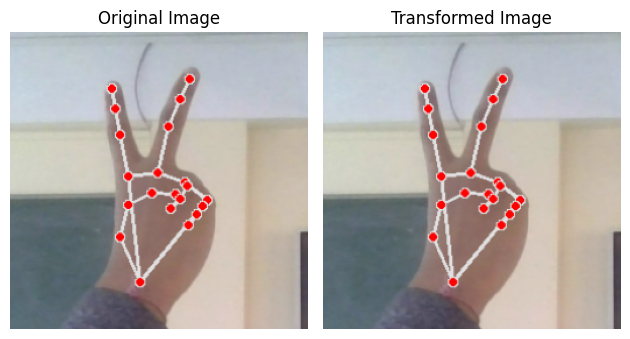

In [29]:
transformed_image_pil = transforms.ToPILImage()(transformed_image)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2)

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')

# Display the transformed image
axes[1].imshow(transformed_image_pil)
axes[1].set_title('Transformed Image')

# Remove the axis labels
for ax in axes:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [15]:
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    device_count = torch.cuda.device_count()

    # Print the device count
    print("Number of CUDA devices:", device_count)

    # Iterate over each CUDA device and print its properties
    for i in range(device_count):
        device = torch.cuda.get_device_name(i)
        print("CUDA Device {}: {}".format(i, device))
else:
    print("CUDA is not available on this system.")

Number of CUDA devices: 1
CUDA Device 0: NVIDIA GeForce GTX 1050


In [18]:
if torch.cuda.is_available():
    # Get the current CUDA device
    device = torch.cuda.current_device()
    print("CUDA Device ID:", device)

    # Get the memory capacity of the CUDA device
    memory_capacity = torch.cuda.get_device_properties(device).total_memory

    memory_capacity_gb = memory_capacity / 1024**3
    print("CUDA Device Memory Capacity (GB):", memory_capacity_gb)
else:
    print("CUDA is not available on this system.")

CUDA Device ID: 0
CUDA Device Memory Capacity (GB): 3.99981689453125


In [20]:
if torch.cuda.is_available():
    # Set the CUDA device with ID 1
    device_id = 0
    torch.cuda.set_device(device_id)

    # Verify the current CUDA device
    current_device = torch.cuda.current_device()
    print("Current CUDA Device:", current_device)
else:
    print("CUDA is not available on this system.")

Current CUDA Device: 0


In [ ]:
tensor([0.5172, 0.4853, 0.4789]) tensor([0.2236, 0.2257, 0.2162]) #first dataset

In [ ]:
tensor([0.5016, 0.4767, 0.4698]) tensor([0.2130, 0.2169, 0.2069]) # second daatset